# Домашнее задание 3: EDA. Interactive visualizations

В этом домашнем задании мы будем работь с набором данных, содержащим цены на дома в городе Эймс штата Айова.    
Данные можно найти в `data/ames_house_prices/`. Описание данных - в `data/ames_house_prices/data_description.txt`. Прочитайте описание переменных перед выполнением задания, мы будем им пользоваться, чтоб понять данные.  
Данные взяты с [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.

Этот набор данных имеет много признаков - всё как в реальной жизни. И мы будем анализировать закономерности в этом наборе данных.  
В данном ДЗ мы отработаем некоторые этапы EDA, так как с функционалом для его выполненния вы уже частично знакомы. Этапы полного EDA были рассмотрены в лекции.

0.В процессе работы размещайте вверху ноутбука, импорт всех необходимых вам библиотек. Это хороший стиль ведения нотубука.

In [1]:
# импорты тут

In [2]:
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt


В Python есть библиотека для удобной работы с путями: [pathlib](https://realpython.com/python-pathlib/).
Часто удобно определить глобальную переменную `DATA` как экземпляр класса `Path`, а потом к нужным нам файлам обращаться используя `DATA/<filename>`.

1.Определите переменную `DATA` как экземпляр класса `Path`. `DATA` должна указывать на путь к папке с данными для задачи. Загрузите `train.csv` в переменную `df_train`, задавая путь через переменую `DATA`.

In [3]:
import pathlib
pathlib.Path.cwd()
DATA = pathlib.Path(r'C:\Users\sergknut\Documents\GItReps\Data_Analisys\rb_python_for_science\Lessons_5_6')

In [4]:
df_train = pd.read_csv(DATA/'train.csv')

2.Выведите информацию о колонках в наборе данных, их типах, количестве **не** null значений в каждой колонке и форме набора данных.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

3.Датасет, который мы рассматриваем - из решения задачи регрессии. Наша целевая переменная - `SalePrice`. И в задаче регрессии предсказать нужно будет её. Нам важно понять, как она распределена и как взаимодействует с другими переменными.   
Лучше всего моделируются переменные близкие к нормальному распределению.

3.1. Постройте функцию плотности (распределение данных) `SalePrice` с помощью seaborn.

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

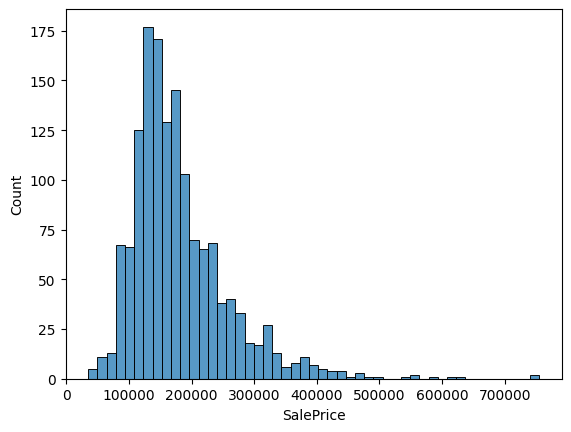

In [7]:
sns.histplot(df_train.SalePrice)

3.2. Выведите асимметрию и эксцесс (на английском - skewness and kurtosis) для `SalePrice` (не визуально, ответ в числовом формате).

In [8]:
df_train.SalePrice.skew() , df_train.SalePrice.kurtosis()

(1.8828757597682129, 6.536281860064529)

Видим, что переменная смещена. То, насколько она похожа на нормальное распределение мы научимся вычислять чуть позже в курсе.

4.Постройте матрицу корреляции, которая будет содержать целевую переменную `SalePrice` и все **числовые**. Отобразите её в виде тепловой карты. 

- Матрица может быть треугольной (без верхней правой части, которая симметричная нижней левой), полной или только одна строка, сожержащая корреляции с переменной `SalePrice`. Но обязательно должно быть закрашивание в зависимости от значения в клетке матрицы.     


- Числовые переменные необходимо выбрать используя функцию pandas, передавать открыто списком будет считаться неправильным выполнением.   
Если по вашему мнению некоторые переменные необходимо преобразовать в числовые перед построением нужной в этом задании визуализации - преобразуйте, но если не преобразуете, это не будет ошибкой.   
Суть задания- выделить функцией только числовые переменные и отобразить матрицу корреляции визуально. Не обязательно подписывать при этом значения в клетках матрицы корреляции. Нам важно понять, с чем потенциально хорошо коррелриует таргет, а с чем - нет.


- Финальный график должен быть удобным для восприятия, читаемым, таким, который вы бы добавили в презентацию для менеджемнта.

In [9]:
df_train.corr()


C:\Users\sergknut\AppData\Local\Temp\ipykernel_52744\2315864323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


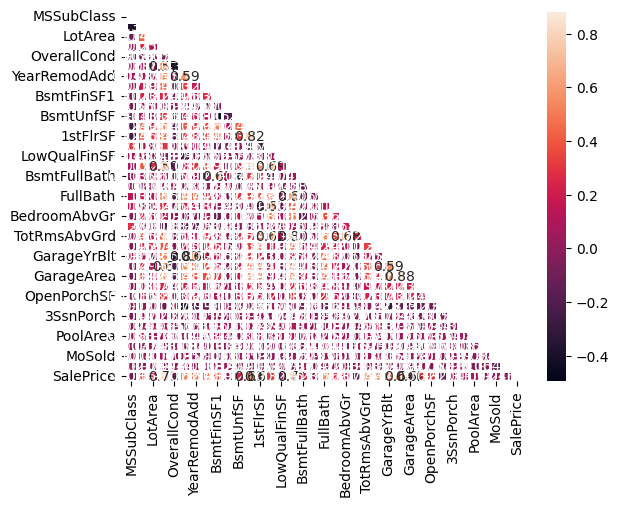

In [10]:

corr_data = df_train.drop(['Id'], axis=1).select_dtypes(['int', 'float'])
matrix =  np.triu(corr_data.corr(numeric_only=True))
sns.heatmap(corr_data.corr(numeric_only=True), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

Какие выводы можно сделать из построенной матрицы корреляций? Какие числовые признаки потенциально сильно влияют на целевую переменную, какие - нет?

4.1. Найдите top 10 переменных (не включая саму SalePrice), с которыми `SalePrice` имеет наибольшую положительну корреляцию. Выведите эти переменные и корреляцию с ними.

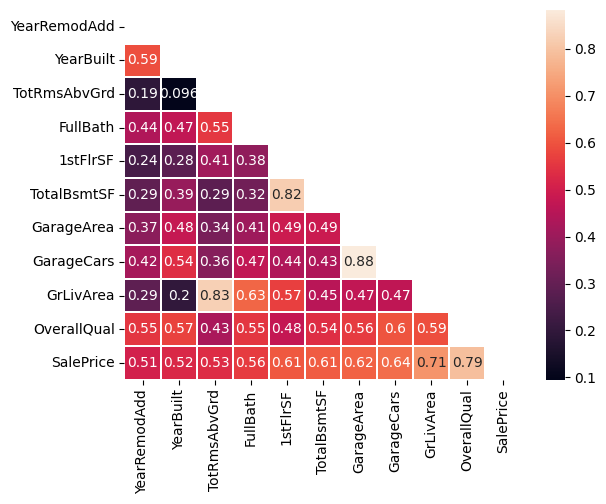

In [11]:
corr_train = df_train.select_dtypes(['int', 'float']).corr().SalePrice.sort_values()[-11:]
matrix =  np.triu(df_train[corr_train.index].corr(numeric_only=True))
sns.heatmap(df_train[corr_train.index].corr(), annot=True,linewidth=0.2, cmap="rocket", mask=matrix);


4.2. Постройте тепловую карту корреляций только среди переменных `SalePrice` и топ 10, коррелирующих с ней. На тепловой карте выведите числом с двумя цифрами после запятой меру корреляции между каждой парой переменных.

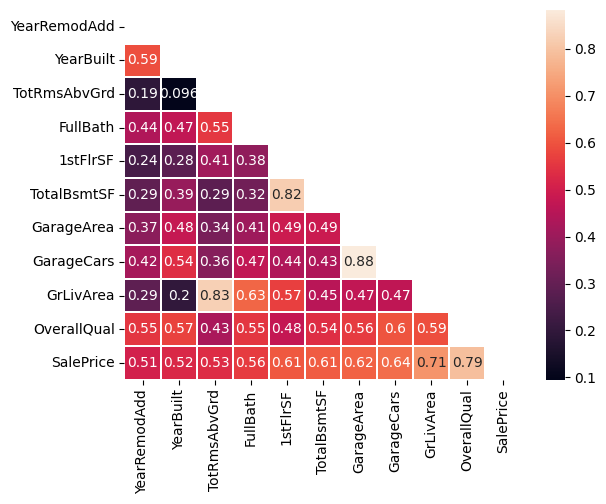

In [12]:
corr_train = df_train.select_dtypes(['int', 'float']).corr().SalePrice.abs().sort_values()[-11:]
matrix =  np.triu(df_train[corr_train.index].corr(numeric_only=True))
sns.heatmap(df_train[corr_train.index].corr(), annot=True,linewidth=0.2, cmap="rocket", mask=matrix);

In [13]:
df_train.select_dtypes(['int', 'float']).corr().SalePrice.abs().sort_values()[-11:]

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [14]:
df_train.select_dtypes(['int', 'float']).corr().SalePrice.sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

4.3. Проанализируйте полученный результат. На ваш взгляд, логично ли, что именно эти признаки наиболее коррелируют с целевой переменной? Обоснуйте свой ответ.

In [15]:
filtered_data = df_train[corr_train.index]

5.Постройте треугольный pairplot для `SalePrice` и топ 10 признаков в наборе данных, коррелирующих с ней.   
Добавьте линии тренда к данным (параметр `kind`). По диагонали выведите kernel density estimation (kde) переменных.

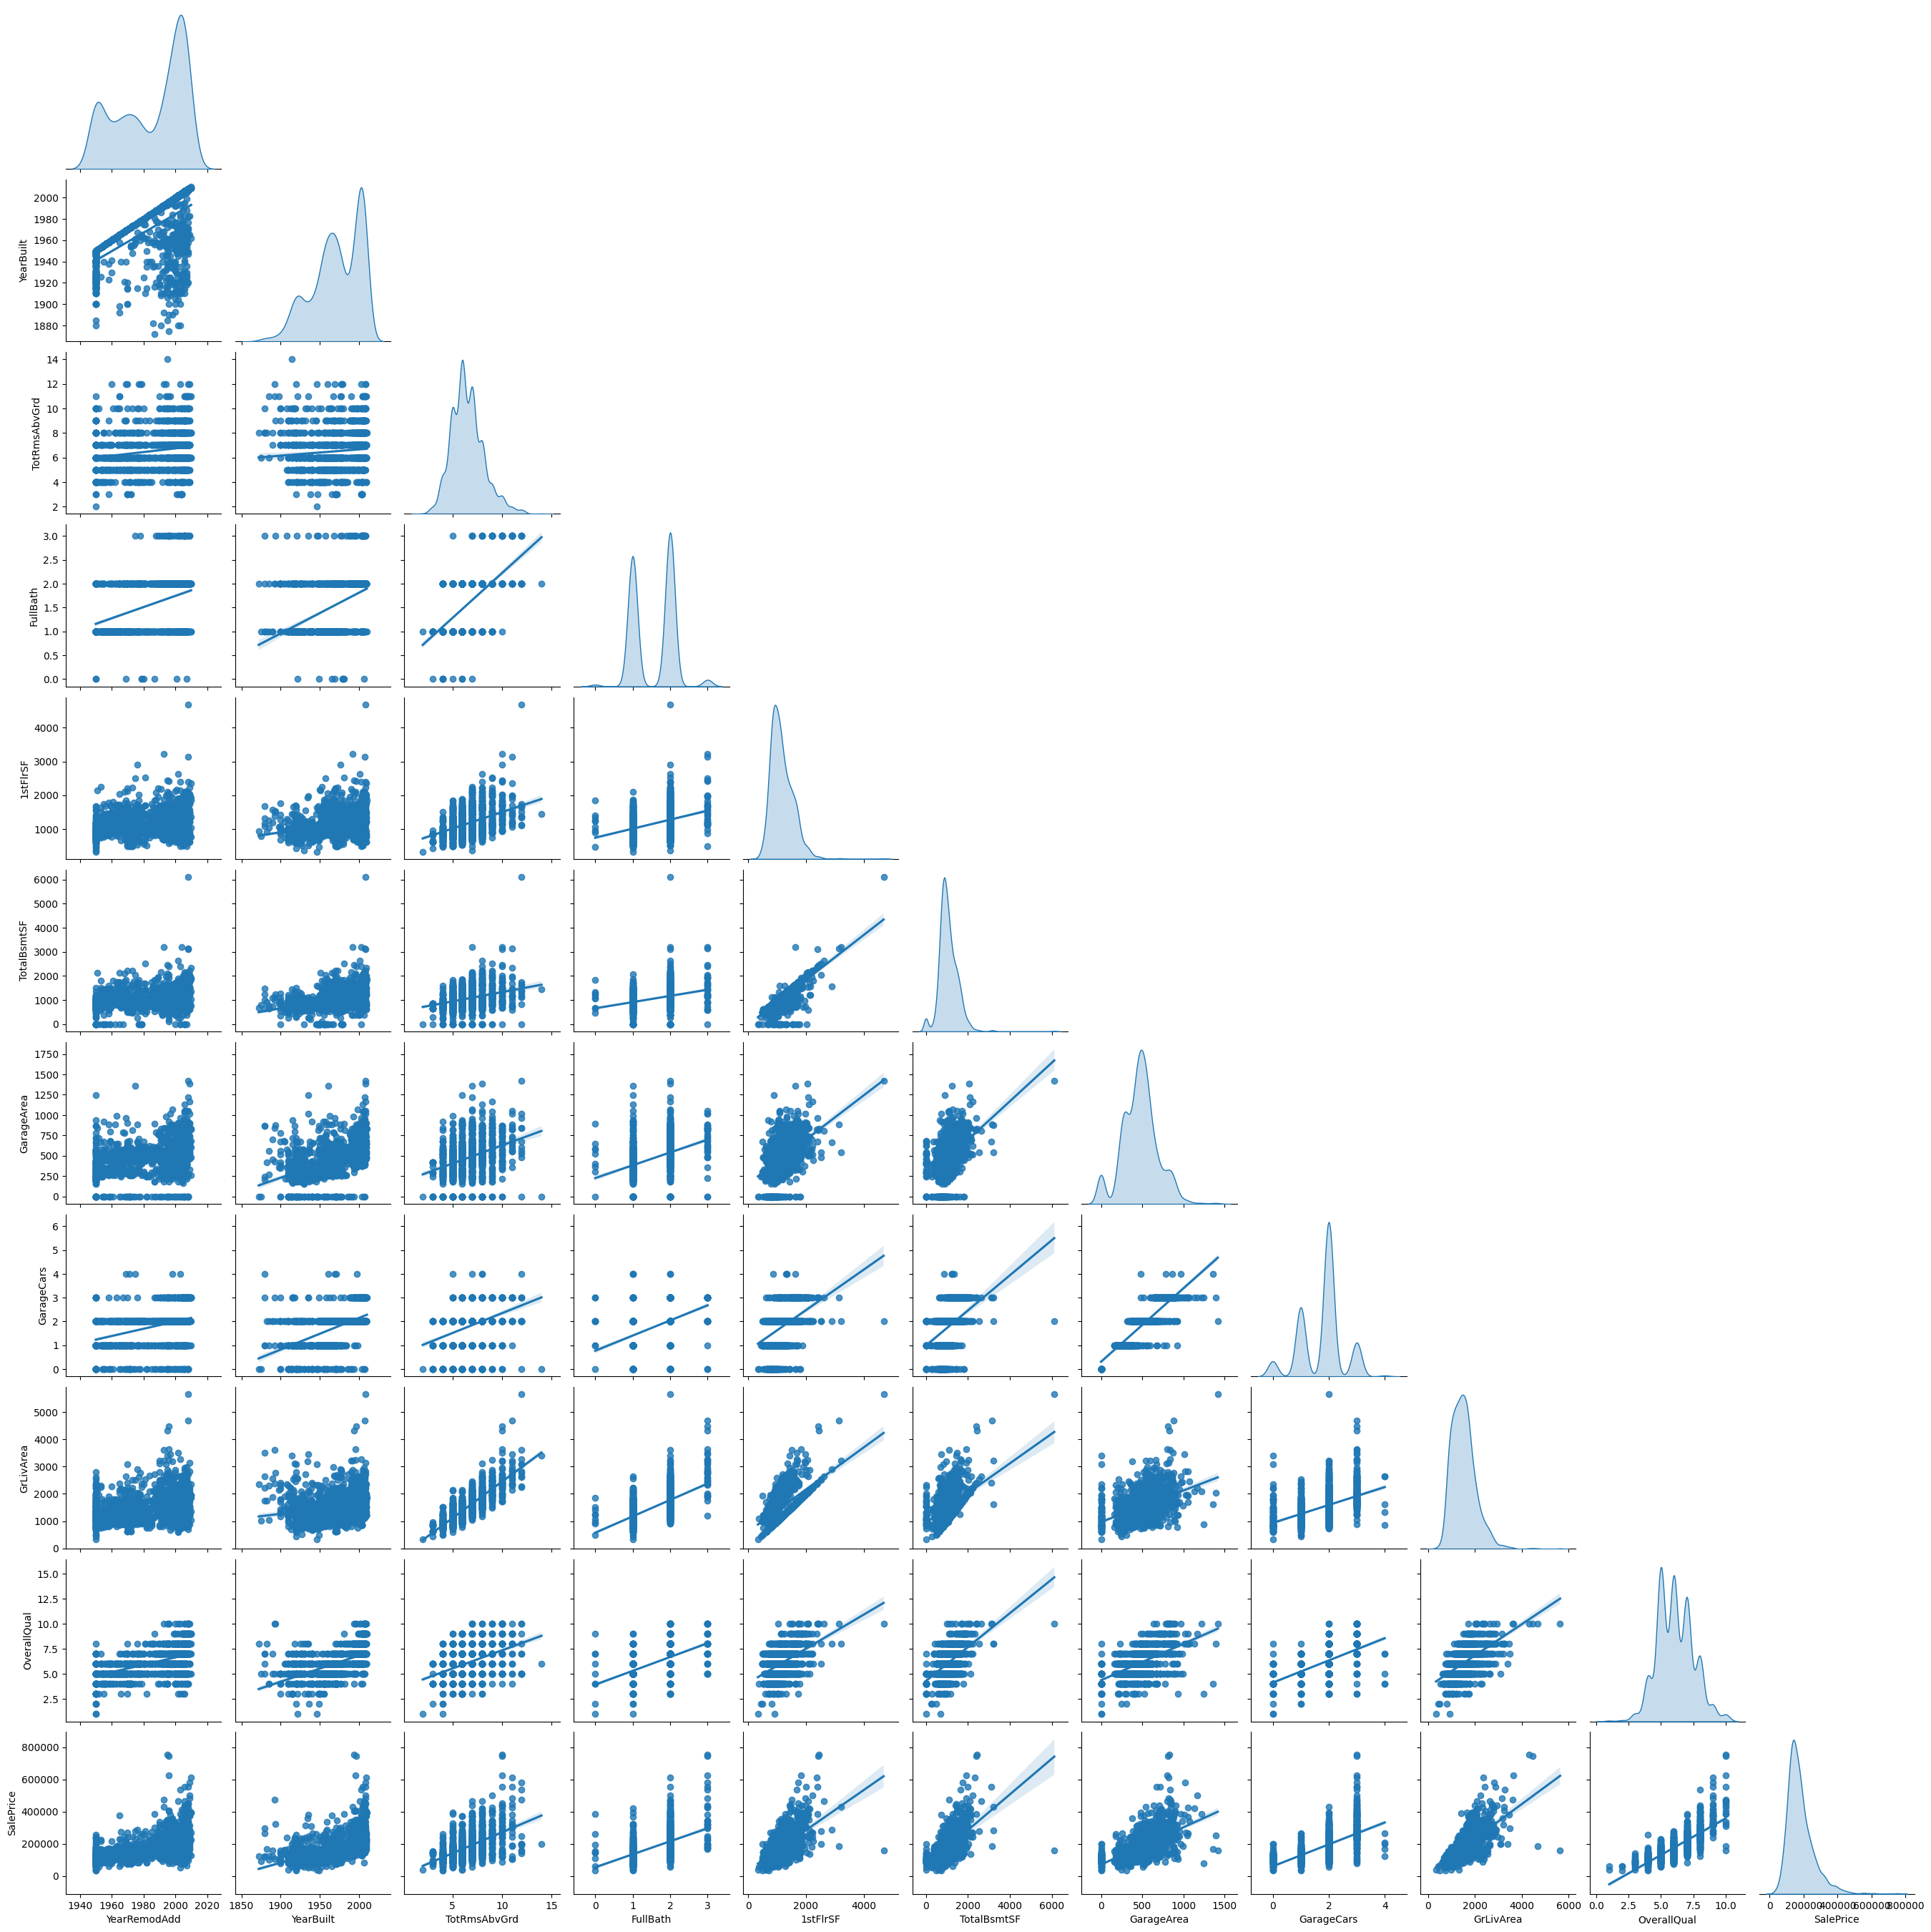

In [16]:
sns.pairplot(filtered_data, diag_kind='kde', corner=True, kind='reg');

Мы можем видеть точки, которые как будто не попали в общий кластер. Их называют аутлаерами (с англ. outliers) или выбросами. Такими являются, к примеру, точки с невысокой SalePrice и при этом высокое значение GrLivArea, или точка со значением TotalBsmtSF около 6000 и при этом низким SalePrice. Давайте рассмотрим, что это за точки. 

5.1. Выведите точки с GrLivArea строго больше 4000.

In [17]:
df1 = df_train.query('GrLivArea > 4000')


5.2. Не все колонки поместились при выведении? Установите параметр пандаса `display.max_columns` равный 100. И выведите запрашиваемые в 5.1 данные ещё раз, чтобы было удобно анализировать данные.

In [18]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [19]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


5.3. Для данных полученных в п. 5.1 дайте ответ на вопрос: чем отличаются точки из выбранных те, у которых низкая цена (менее 200000) от тех, у которых цена высокая (более 700000)?

Чтобы легче было дать ответ на этот вопрос, отбросьте колонки, в которых записи для выбранных строк одинаковые во всех строках (везде одно и то же число/строка/дата). Сколько колонок получилось в результате отбрасывания мало информативных? Выведите оставшиеся колокнки и дайте ответ на заданный в начале этого пункта вопрос.

В ответе приведите свои гипотезы (минимум 3) насчёт отличий с точки зрения признаков (какие признаки более всего влияют на разницу в цене?). Гипотезы отсортируйте по убыванию гипотетического влияния (то есть , на первом месте самая на Ваш взгляд рабочая гипотеза, на последнем - самая менее рабочая). Цель ранжирования: представьте, что Вам надо определить топ гипотез и выяснить разница в цене случайная, или проблема в данных. У вас на это ограниченное время, что бы вы проверяли в первую очередь?

In [20]:
import plotly.express as px

In [21]:
df1[df1.nunique()[df1.nunique()>1].index].sort_values('SalePrice')['GrLivArea']

1298    5642
523     4676
1182    4476
691     4316
Name: GrLivArea, dtype: int64

5.4. Постройте диаграмму рассеяния с помощью Plotly express, в которой по оси ОХ GrLivArea, по оси ОУ SalePrice, цвет - Condition1 и при наведении на точку чтоб выводилась дополнительная информация об id объекта (параметр `hover_data`).

In [22]:
import plotly.express as px

In [35]:
fig = px.scatter(df_train
                , x=df_train.GrLivArea
                , y=df_train.SalePrice
                , color='Condition1'
                , hover_data=['Id', 'SaleType']
                )
fig.show()

Для дома с Id=1299 мы могли бы обосновать низкую цену тем, что он имеет параметр Condition1=FeedR (точки с этим параметром обычно имеют ниже цену), а вот с Id=524 Condition1 = PosN вряд ли влияет негативно на цену, скорее наоборот. Похоже причина низкой цены этих домов - другая. 

5.5. Постройте диаграмму рассеяния с помощью Plotly express, в которой по оси ОХ GrLivArea, по оси ОУ SalePrice, цвет - Neighborhood и при наведении на точку чтоб выводилась дополнительная информация об id объекта.

In [56]:
fig = px.scatter(df_train
                , x=df_train.GrLivArea
                , y=df_train.SalePrice
                , color='Neighborhood'
                , hover_data=['Id', 'SaleType']
                )
fig.show()

Посмотрите на SalePrice по разным Neighborhood, видите ли вы закономерности?  
Выведите mean, std, min, max, mode значения SalePrice для разных значений Neighborhood (оптимально - с использованием функций groupby() и describe()), отсортируйте значения по убыванию mean, сделайте градиентное закрашивание таблицы. Подтверждаются ли найденные закономерности с диаграммы?

In [55]:
df_train.groupby(['Neighborhood']).describe()['SalePrice'].sort_values('mean', ascending=False).style.background_gradient(axis=0, cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


In [48]:
!pip3.11 install Jinja2

     -------------------------------------- 133.1/133.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for MarkupSafe: started
  Running setup.py install for MarkupSafe: finished with status 'done'


  DEPRECATION: MarkupSafe is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


Похоже дома  Id=524 и  Id=1299 имеют соседство, в котором стоимости домов низкие. Этим возможно и обосновывается цена. Но это только гипотеза.

6.1. C помощью библиотеки missingno выведите в виде bar chart количество отсутствующих значений в колонках датасета. Чтобы просматривать было комфортно, выведите на одной фигуре две панели расположенные вертикально (т.е. вторая под первой), где на первой панели будет инфорпмация про отсутствующие значения в первых 40 колонках, а на второй - во всех остальных.

In [57]:
!pip3.11 install missingno

     ---------------------------------------- 39.9/39.9 MB 1.1 MB/s eta 0:00:00


In [58]:
import missingno as msno

''

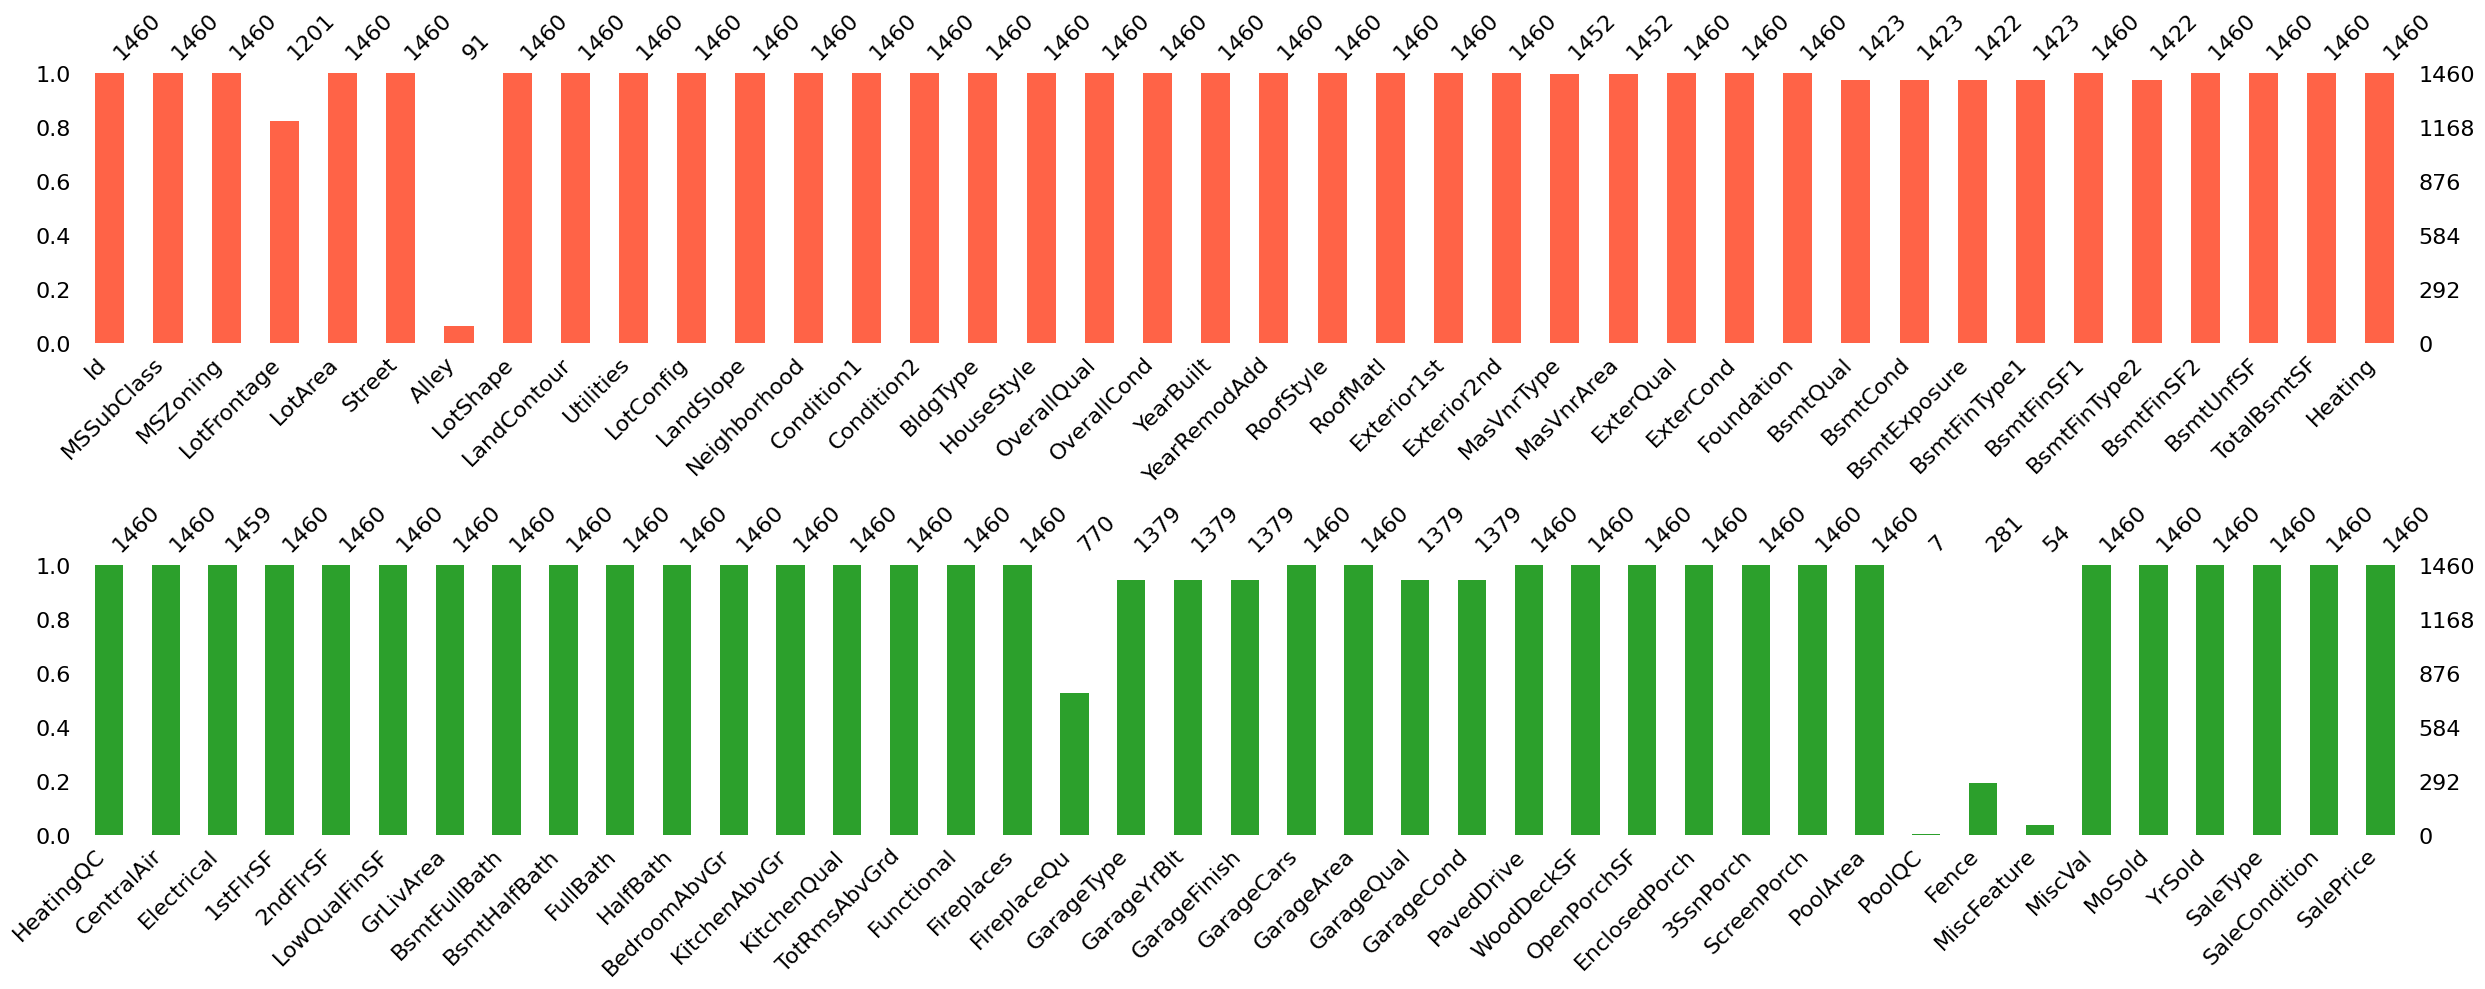

In [70]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
msno.bar(df_train.iloc[:,:40], color='tomato')
ax2 = fig.add_subplot(2,1,2)
msno.bar(df_train.iloc[:,40:], color='tab:green')
plt.tight_layout()
;

Пользуясь визуализацией, определите, в каких колонках отсутствует более половины записей. Ответ - текстом названия колонок.

In [28]:
# ваш ответ тут

6.2.1. Проведём подобный анализ не визуально, а аналитически, чтобы вы имели возможность выбрать то, что вам удобнее. 
Посчитайте, сколько значений отсутствуют в каждой из колонок датафрейма df_train (используйте функцию isna() и гугл при необходимости).  
Запишите результат в переменную count_na.


In [73]:
count_na = df_train.isna().sum()

In [74]:
count_na

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

6.2.2. Пользуясь переменной count_na выведите колонки, у которых процент отсутствующих значений строго более 50. 
Ответом должна быть структура pd.Series с индексом - название колонки и значениями - процент отсуствующих значений в этой колонке.

In [78]:
count_na[count_na/len(df_train) > 0.5]/len(df_train)

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

Сравните полученные результаты с теми, что вы указали в п. 6.1, они должны совпадать.

6.3. Выведите матричное отображение отсутствующих значений с помощью библиотеки missingno. Найдите, какое максимальное количество заполненных данных в одной строке и какое - минимальное. Количество заполненных данных в одной строке ограничено сверху количеством колонок.  

Внимание: чтобы ответить на заданные вопрос корректно пользуясь визуализацией, вам необходимо вывести тут на **одной** диаграмме **все** колонки сразу (они поместятся).

In [92]:
df_train[df_train.isnull().sum(axis=1) == df_train.isnull().sum(axis=1).max()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1965,1965,Hip,CompShg,AsphShn,AsphShn,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,SBrkr,1664,0,0,1664,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
1218,1219,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,N,SBrkr,672,240,0,912,0,0,1,0,2,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,80500


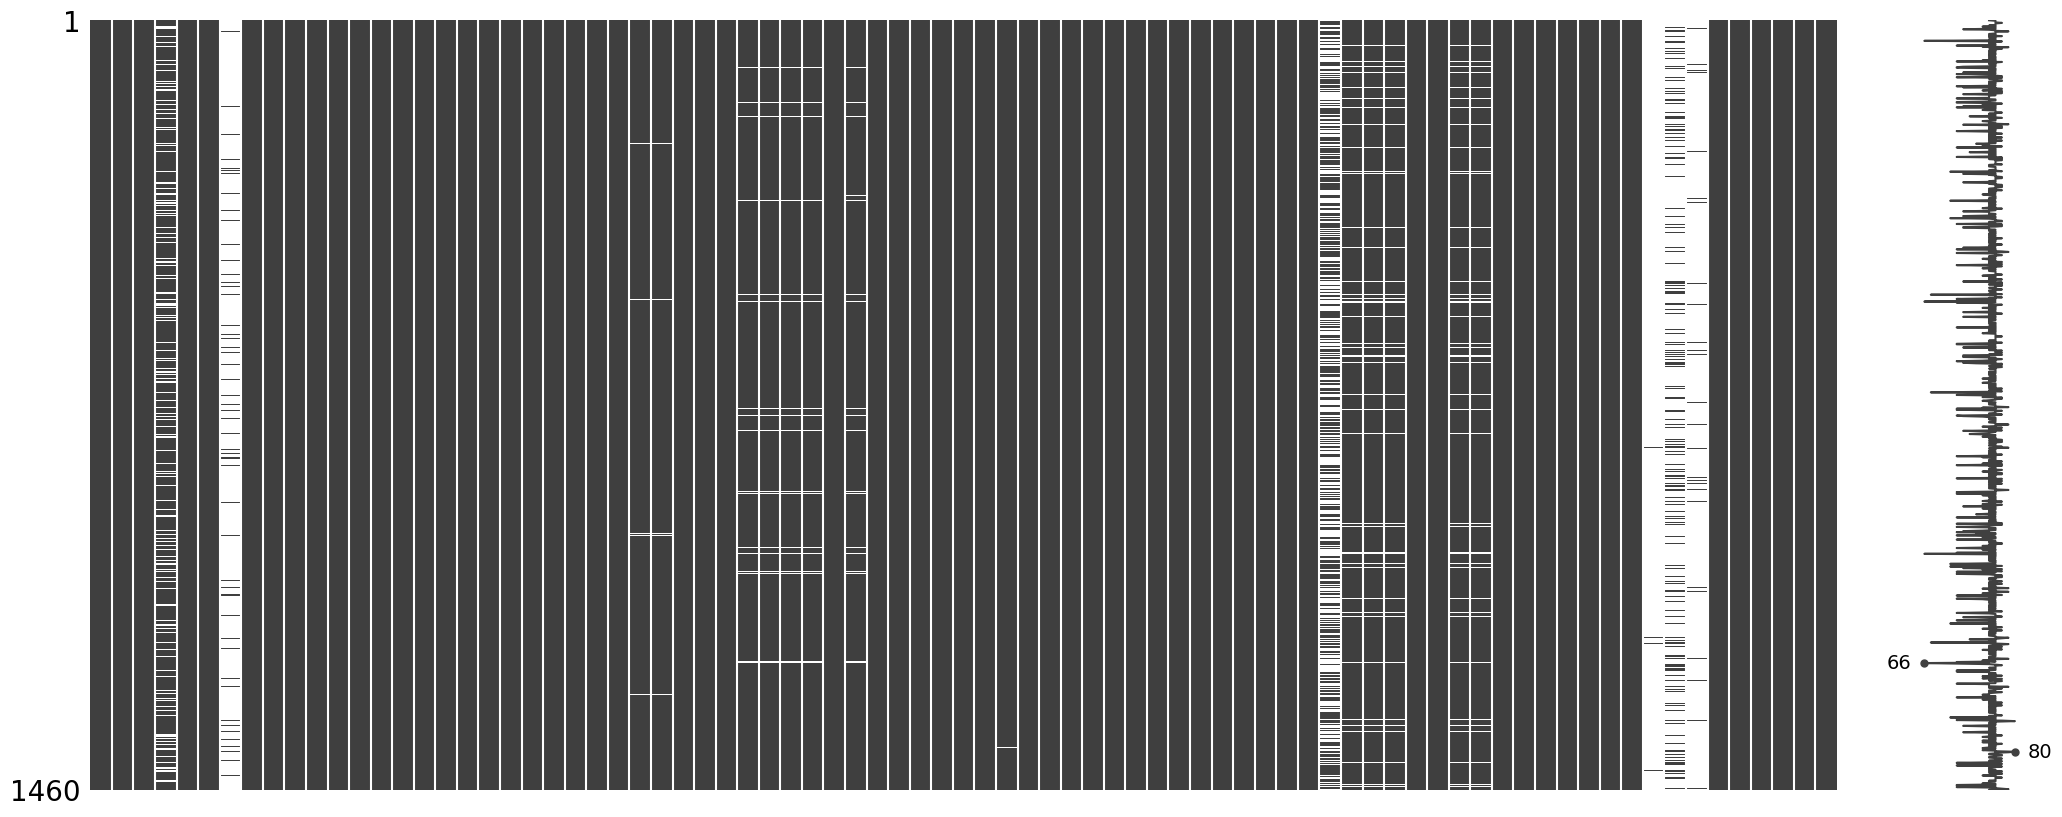

In [88]:
msno.matrix(df_train);

6.4. Выведите тепловую карту отвутствующих значений с помощью библиотеки missingno.  
Если отсутствуют значения в переменной GarageType, у каких ещё переменных тоже будут отсутствовать значения?

<AxesSubplot: >

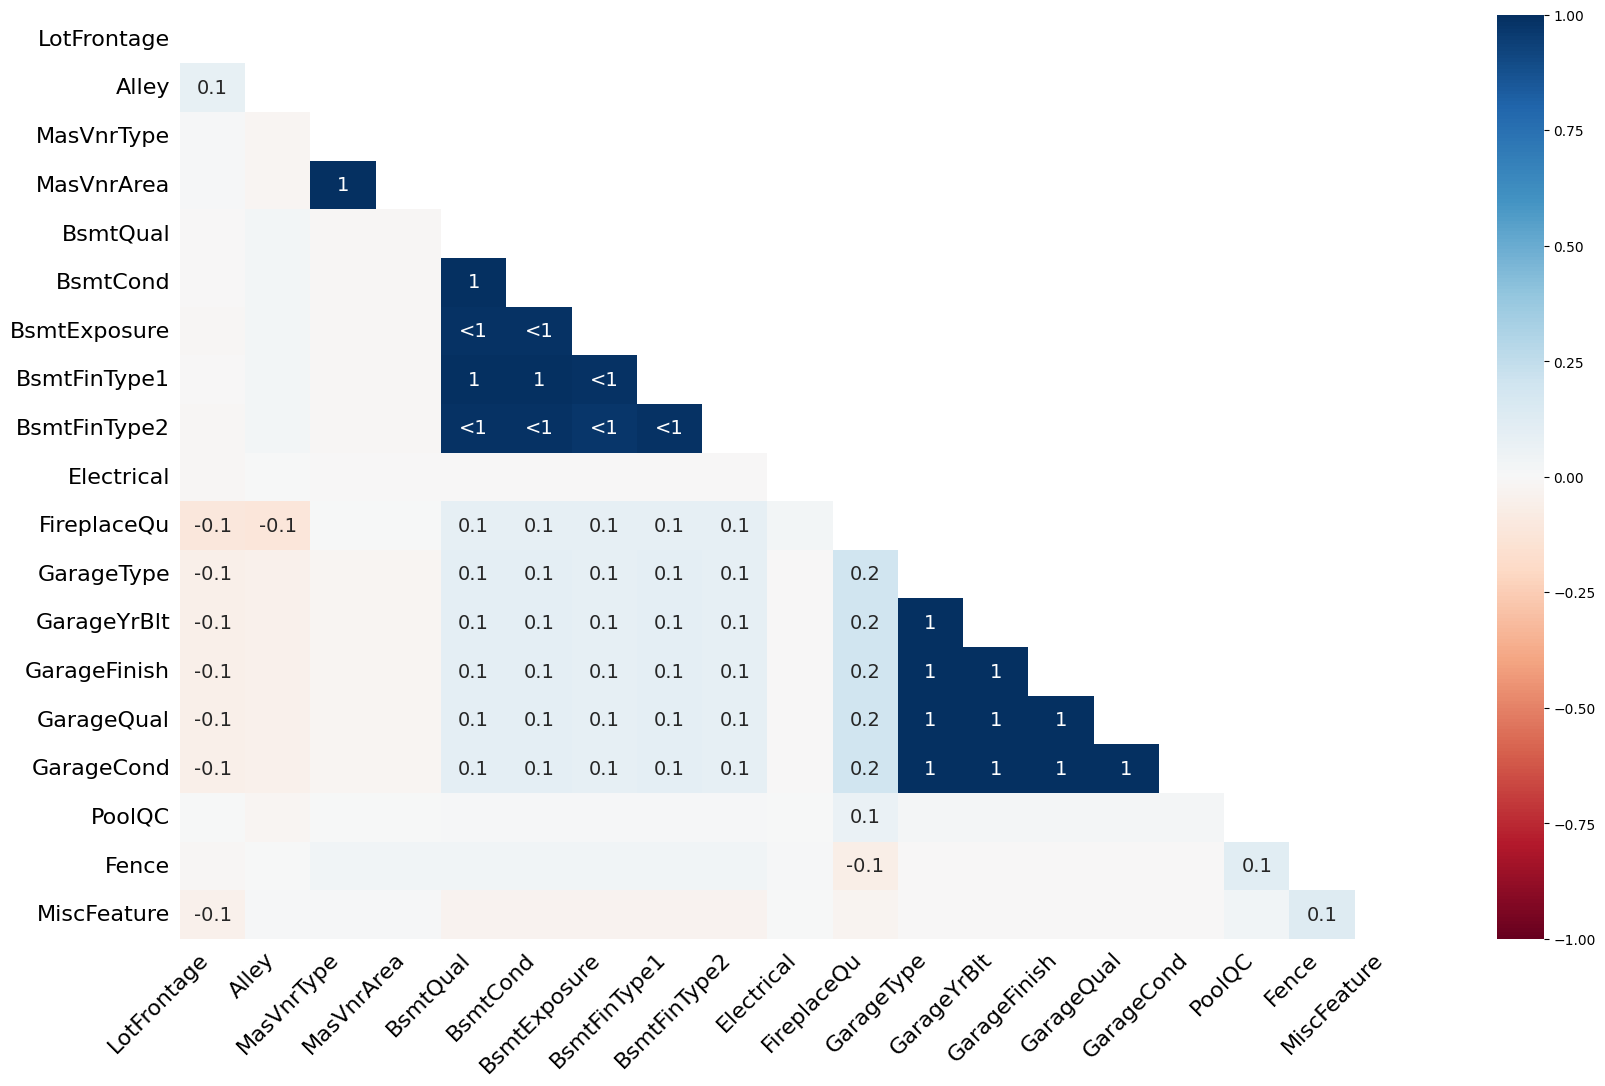

In [93]:
msno.heatmap(df_train)

In [34]:
# ваш ответ тут